<a href="https://colab.research.google.com/github/Angeles34567/IS_4487_Tokyo/blob/main/day3_lab_retailer_intro_Angeles_Marquez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 3 Lab, IS 4487

Outline

Repeat exercises from Lab 2, for practice, but with the *SuperStore Retail Orders* dataset

- Loading installed packages
- Inspect data
- Clean data
- Summarize data
- Explore plot types and search for insights

Please use the Gemini AI tool to get coding ideas.



# Notebook Instructions
- Remember to save a copy of the notebook in Drive so that you can save your changes.
- Complete the Assignment Tasks.
- When you are done revising this notebook save your changes to GitHub and upload the URL for the file to Canvas for the assignment.
- Some of these assignments ask you to do things we have not covered yet.  Use AI to come up with a solution.

# Load Libraries

➡️ Assignment Tasks
- Load Pandas

In [6]:
# your code goes here

import pandas as pd

# Load Data

In [7]:
ss = pd.read_csv("https://raw.githubusercontent.com/jefftwebb/is_4487_base/main/Labs/DataSets/superstore_retail_orders.csv")

# Summarize and Review Data

➡️ Assignment Tasks

- Describe or profile the dataframe

In [8]:
# Your code goes here
ss.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


In [9]:
ss.describe()

,order_id,quantity,product_price
count,56045.000000,56006.000000,56045.000000
mean,61668.066340,3.348498,6195.540505
std,7508.229651,422.646565,35784.727716
min,45079.000000,1.000000,2.290000
25%,55644.000000,1.000000,7.950000
50%,61869.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


In [10]:
ss.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price
0,51188,2021-07-01,2021-07,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
1,51187,2021-07-01,2021-07,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
2,51199,2021-07-02,2021-07,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
3,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
4,51297,2021-07-08,2021-07,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99


# Prepare Data

➡️ Assignment Tasks
- Remove rows with empty (NULL) values
- Locate outliers in any of the variables.   Filter them out if they appear to be mistakes; keep them if they are exceptional cases.
- Create a new field: total_purchase. This should be product_price x quantity.

In [11]:
# Drop NAs
ss_clean = ss.dropna()

In [14]:
# Search for and filter outliers
ss_clean = ss_clean[ss_clean['product_price'] < 200000]
ss_clean = ss_clean[ss_clean['quantity'] < 1000]

In [16]:
# create total_purchase
ss_clean = ss_clean.assign(total_purchase = ss_clean['product_price'] * ss_clean['quantity'])

Check that your cleaning worked

In [15]:
# your code goes here
ss_clean.describe()

,order_id,quantity,product_price
count,54172.000000,54172.000000,54172.000000
mean,61642.049103,1.516134,614.104032
std,7518.886689,3.533349,816.680482
min,45079.000000,1.000000,2.290000
25%,55623.000000,1.000000,7.950000
50%,61854.500000,1.000000,475.600000
75%,68063.000000,2.000000,914.620000
max,74147.000000,600.000000,3578.270000


In [17]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


# Summarize Data

➡️ Assignment Tasks
- Calculate the average price per year-month
- Calculate the total revenue per year month

Does more cleaning need to be done? If so, do it and then recreate the above summary tables.

In [46]:
# average price
avg_prices = ss_clean.groupby(['order_year_month'])['product_price'].mean()

avg_prices_20 = avg_prices.filter(like='20', axis=0)

print(avg_prices_20)

order_year_month
2020-01    3172.420978
2020-02    3199.469359
2020-03    3242.035279
2020-04    3194.646275
2020-05    3192.571359
2020-06    3132.275911
2020-07    1959.974251
2020-08    1924.981087
2020-09    1764.130833
2020-10    1800.830762
2020-11    1666.368901
2020-12    1729.697795
2021-01    1774.621612
2021-02    1755.272269
2021-03    1760.495962
2021-04    1691.161107
2021-05    1640.100368
2021-06    1694.477581
2021-07     729.851550
2021-08     409.107649
2021-09     437.462140
2021-10     434.127245
2021-11     468.310875
2021-12     500.330821
2022-01     469.658801
2022-02     481.718170
2022-03     485.269651
2022-04     482.481023
2022-05     513.701953
2022-06     509.168107
2029-06       3.640000
2029-07     498.690357
2029-08       6.656667
Name: product_price, dtype: float64


In [47]:
# total revenue
filtered_revenue_20 = filtered_revenue.filter(like='20', axis=0)

print(filtered_revenue_20)

order_year_month
2020-01      583725.46
2020-02      530915.09
2020-03      642055.94
2020-04      651707.84
2020-05      657669.70
2020-06      668056.44
2020-07      484113.64
2020-08      534106.43
2020-09      341233.48
2020-10      401585.26
2020-11      323436.76
2020-12      559483.05
2021-01      429458.43
2021-02      470781.45
2021-03      468580.53
2021-04      488745.56
2021-05      540842.34
2021-06      529408.57
2021-07     5942492.63
2021-08    24558308.79
2021-09    26539577.99
2021-10    26908138.22
2021-11    27527797.42
2021-12    31004392.53
2022-01    29366224.47
2022-02    29834718.07
2022-03    27926891.92
2022-04    32248236.87
2022-05    38500027.06
2022-06    36508537.88
2029-06           7.28
2029-07      277370.99
2029-08          19.97
Name: product_price, dtype: float64


# Plot Data

➡️ Assignment Tasks
- Produce two plots that show patterns or relationships in the data.
- Interpret these patterns for potential value to the business.  

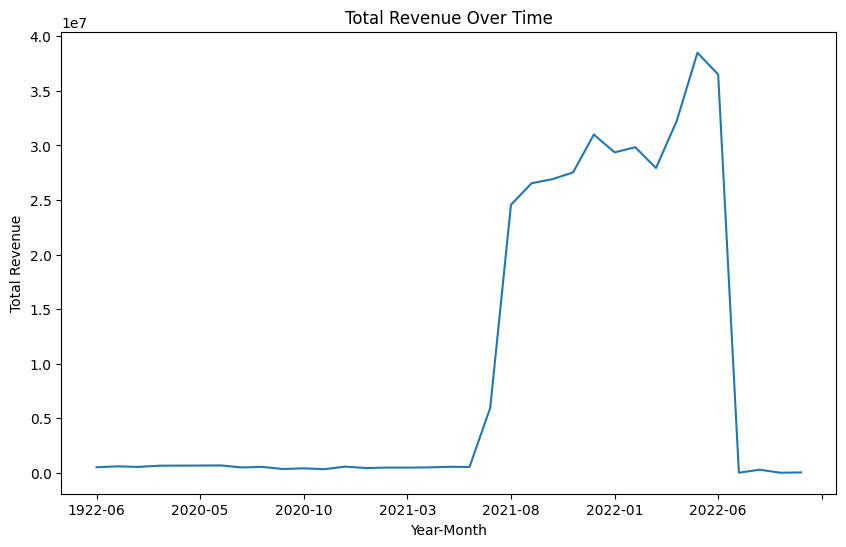

In [50]:
# Your code goes here.  Plot 1
total_revenue_per_month.plot(kind='line', figsize=(10, 6))
plt.title('Total Revenue Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.show()

# The pattern I see is that the total revune increased the most during the year 2022.The other years it stayed steady.

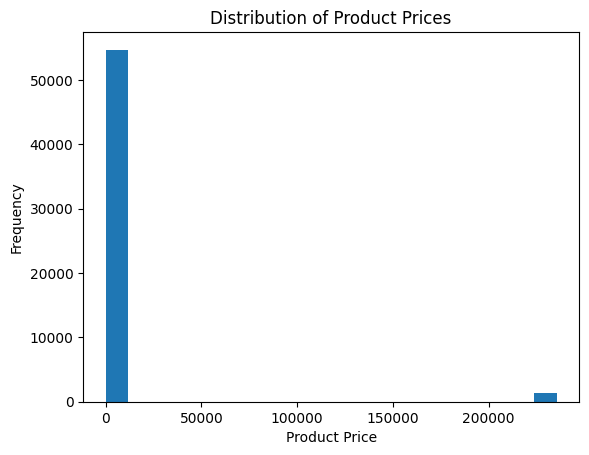

In [51]:
# Your code goes here.  Plot 2
plt.hist(ss['product_price'], bins=20)
plt.title('Distribution of Product Prices')
plt.xlabel('Product Price')
plt.ylabel('Frequency')
plt.show()

# The pattern I see in this plot is the popular product price was the highest and closer to 0.

Make an interpretive comment.